# EIGENFACES

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import numpy as np
import os
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
DATA_PATH = '/home/master/Projects/Py_Projects/ObjectRecognition/dataset/faces/'
IMG_WIDTH = 250
IMG_HEIGHT = 250

n_components = 100

## Import data

In [3]:
pictures = dict()
dirs = sorted(os.listdir(DATA_PATH))
print(dirs)
for d in dirs:
    pictures[d] = []
    for f in os.listdir(os.path.join(DATA_PATH, d)):
        if f[-4:] == '.pgm':
            pictures[d].append(np.asarray(Image.open(os.path.join(DATA_PATH + d, f)).convert('L')))
            
labels = pictures.keys()
print("Total persons:", len(labels))
for d in labels:
    pictures[d] = np.asarray(pictures[d])
    print(d, pictures[d].shape)

['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37']
Total persons: 37
s01 (10, 112, 92)
s02 (10, 112, 92)
s03 (10, 112, 92)
s04 (10, 112, 92)
s05 (10, 112, 92)
s06 (10, 112, 92)
s07 (10, 112, 92)
s08 (10, 112, 92)
s09 (10, 112, 92)
s10 (10, 112, 92)
s11 (10, 112, 92)
s12 (10, 112, 92)
s13 (10, 112, 92)
s14 (10, 112, 92)
s15 (10, 112, 92)
s16 (10, 112, 92)
s17 (10, 112, 92)
s18 (10, 112, 92)
s19 (10, 112, 92)
s20 (10, 112, 92)
s21 (10, 112, 92)
s22 (10, 112, 92)
s23 (10, 112, 92)
s24 (10, 112, 92)
s25 (10, 112, 92)
s26 (10, 112, 92)
s27 (10, 112, 92)
s28 (10, 112, 92)
s29 (10, 112, 92)
s30 (10, 112, 92)
s31 (10, 112, 92)
s32 (10, 112, 92)
s33 (10, 112, 92)
s34 (10, 112, 92)
s35 (10, 112, 92)
s36 (10, 112, 92)
s37 (10, 112, 92)


## Split dataset

In [4]:
train = []
l_train = []
test = []
l_test = []

for d in labels:
    train.append(pictures[d][0])
    test += list(pictures[d][1:])
    
    l_train.append(d)
    l_test += [d] * len(list(pictures[d][1:]))

In [5]:
train = np.asarray(train)
test = np.asarray(test)

## Train model

In [6]:
import EF
import importlib
importlib.reload(EF)
classifier = EF.EigenFacesClassifier(len(dirs))
classifier.fit(train, l_train)

## Make predictions

In [7]:
predictions = classifier.predict(test)
accuracy = accuracy_score(l_test, predictions)
print(accuracy)

0.5915915915915916


## Compare different number of classes

Classes: 5
     5 0.8


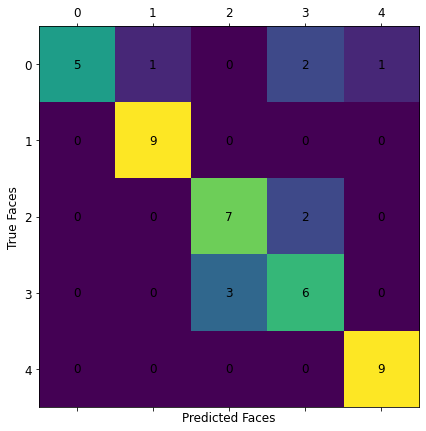

Classes: 10
     5 0.8


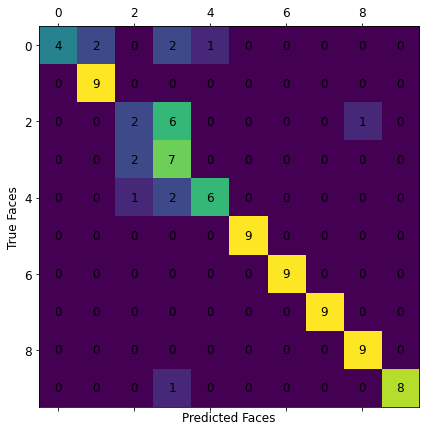

10 0.8555555555555555


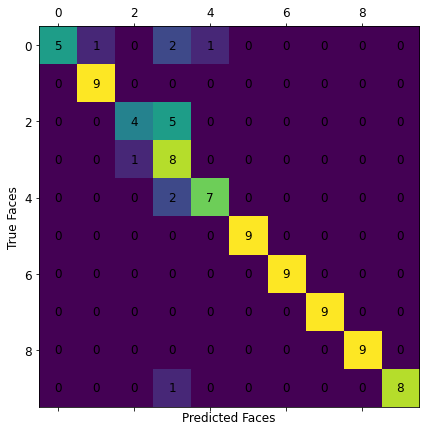

Classes: 20
     5 0.5777777777777777


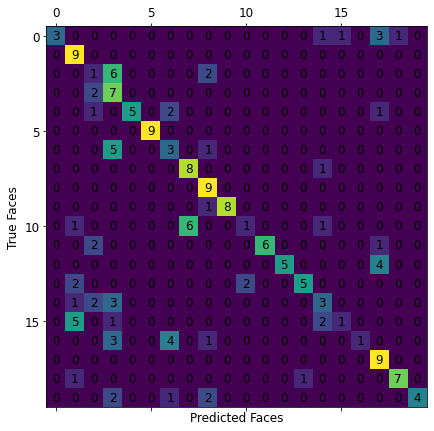

10 0.6444444444444445


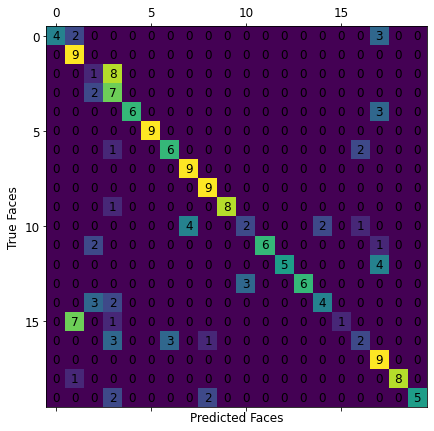

20 0.6722222222222223


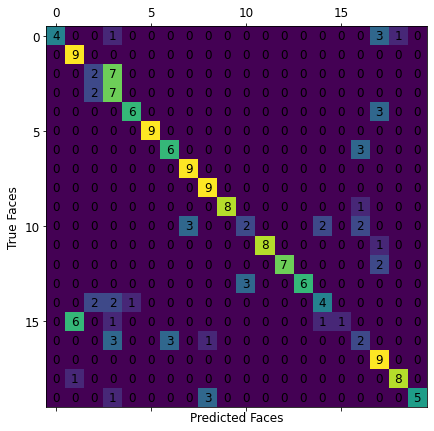

Classes: 37
     5 0.4294294294294294


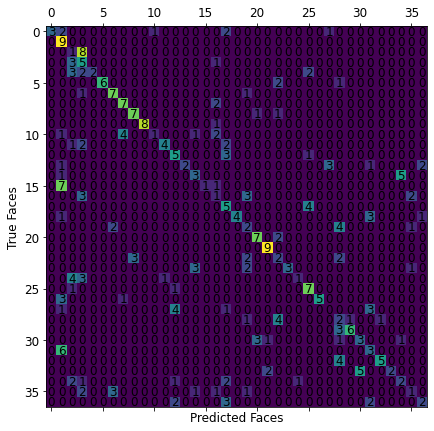

10 0.5285285285285285


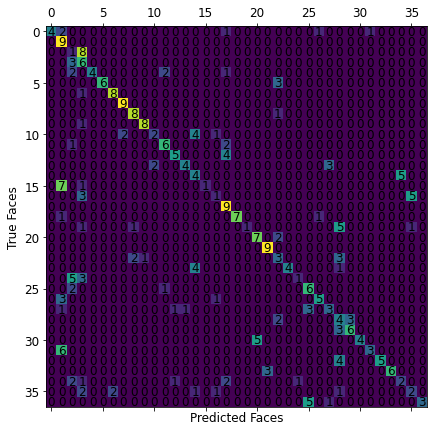

20 0.5675675675675675


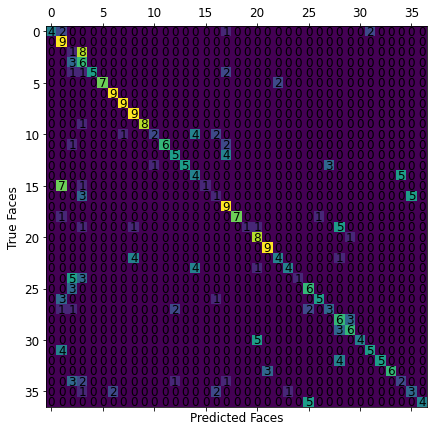

37 0.5915915915915916


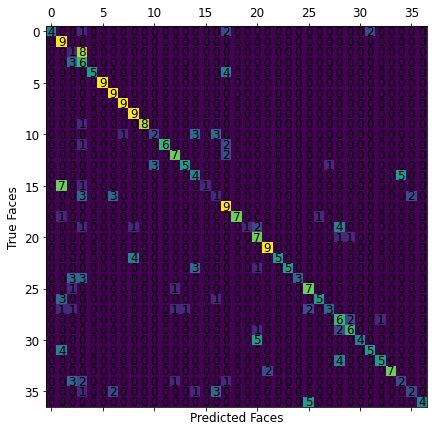

In [8]:
mpl.rcParams['font.size'] = 12

for c in [5, 10, 20, 37]:
    print('Classes:', c)
    for n in [5, 10, 20, 37]:
        if c >= n:
            train = []
            l_train = []
            test = []
            l_test = []

            for d in list(labels)[:c]:
                train.append(pictures[d][0])
                test += list(pictures[d][1:])

                l_train.append(d)
                l_test += [d] * (pictures[d].shape[0] - 1)
            train = np.asarray(train)
            test = np.asarray(test)

            importlib.reload(EF)

            classifier = EF.EigenFacesClassifier(n)
            classifier.fit(train, l_train)

            predictions = classifier.predict(test)
            accuracy = accuracy_score(l_test, predictions)
            print('    ', n, accuracy)
            
            conf_matrix = confusion_matrix(l_test, predictions)
            
            fig, ax = plt.subplots(figsize=(7,7))

            ax.set_xlabel('Predicted Faces')
            ax.set_ylabel('True Faces')
            ax.matshow(conf_matrix)
            for i in range(c):
                for j in range(c):
                    ax.text(j, i, conf_matrix[i, j], va='center', ha='center')
            plt.show()